# Retail Orders SQL Analytics (Pandas Edition)

## 1. Introduction
## 2. Load and Explore the Dataset
## 3. Data Cleaning and Feature Engineering
## 4. Business Questions Answered via SQL-style Pandas
    - Total sales by region
    - Top 5 products by revenue
    - Number of unique customers per region
    - Monthly revenue trend
    - Average order value by category
## 5. Insights & Business Recommendations
## 6. Conclusion


#### Loading and Exploring the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("retail_orders.csv")

# Preview structure
print(df.shape)
df.head()

(1000, 9)


,order_id,order_date,customer_id,region,product,category,quantity,unit_price,total_price
0,4174,2021-01-01,308,East,Phone,Technology,5,634.01,3170.05
1,4507,2021-01-02,204,East,Laptop,Furniture,4,990.41,3961.64
2,1860,2021-01-03,318,East,Chair,Technology,2,332.52,665.04
3,2294,2021-01-04,232,West,Laptop,Technology,5,359.77,1798.85
4,2130,2021-01-05,317,South,Printer,Technology,2,106.57,213.14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     1000 non-null   int64         
 1   order_date   1000 non-null   datetime64[ns]
 2   customer_id  1000 non-null   int64         
 3   region       1000 non-null   object        
 4   product      1000 non-null   object        
 5   category     1000 non-null   object        
 6   quantity     1000 non-null   int64         
 7   unit_price   1000 non-null   float64       
 8   total_price  1000 non-null   float64       
 9   year         1000 non-null   int32         
 10  month        1000 non-null   int32         
 11  month_name   1000 non-null   object        
 12  quarter      1000 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(4)
memory usage: 90.0+ KB


#### Data Cleaning and Feature Engineering

In [3]:
#Renaming columns for simplicity
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={'price_each': 'unit_price', 
                   'quantity_ordered': 'quantity',
                   'order_revenue': 'total_price'}, inplace=True)

In [6]:
#Create Time-Based Features (for grouping later)
df['order_date'] = pd.to_datetime(df['order_date'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.strftime('%b')
df['quarter'] = df['order_date'].dt.quarter

In [8]:
#Checking for Missing Values and Duplicates
print(df.isnull().sum())         # Check for missing values
print(df.duplicated().sum())     # Check for duplicate rows

order_id       0
order_date     0
customer_id    0
region         0
product        0
category       0
quantity       0
unit_price     0
total_price    0
year           0
month          0
month_name     0
quarter        0
dtype: int64
0


#### Business Questions Answered via SQL-style Pandas

In [9]:
# 1. What is the total revenue by region?

In [10]:
revenue_by_region = df.groupby('region')['total_price'].sum().sort_values(ascending=False)
print(revenue_by_region)

region
West       425411.83
South      381314.51
East       371130.29
Central    357169.06
Name: total_price, dtype: float64


In [11]:
#2. Top 5 best-selling products by total revenue

In [12]:
top_products = df.groupby('product')['total_price'].sum().sort_values(ascending=False).head(5)
print(top_products)

product
Desk       245544.47
Tablet     232533.40
Monitor    231912.62
Chair      216057.00
Printer    203636.90
Name: total_price, dtype: float64


In [13]:
# 3. How many unique customers are there per region?

In [14]:
unique_customers = df.groupby('region')['customer_id'].nunique()
print(unique_customers)

region
Central    139
East       136
South      145
West       145
Name: customer_id, dtype: int64


In [15]:
# 4. What is the monthly revenue trend?

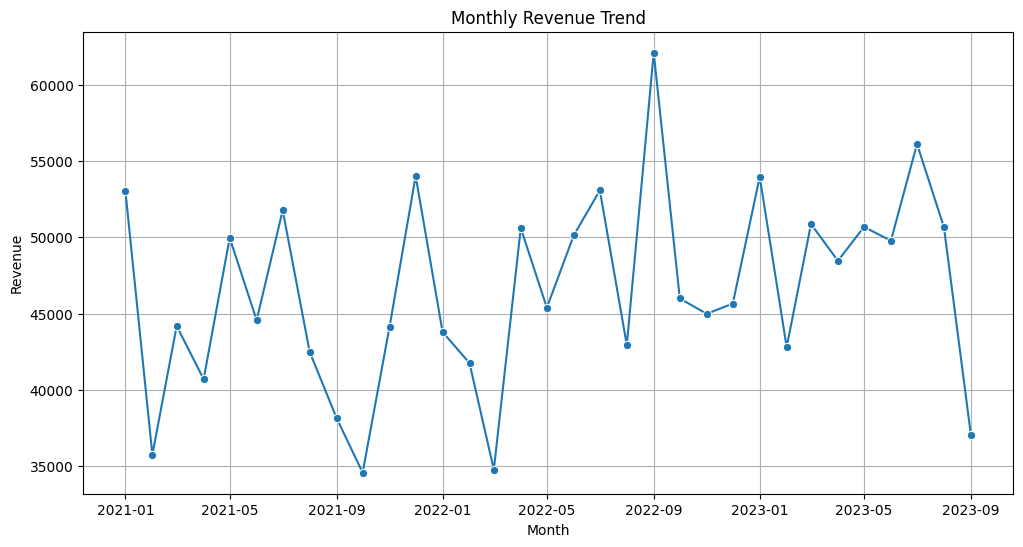

In [16]:
monthly_revenue = df.groupby(['year', 'month'])['total_price'].sum().reset_index()
monthly_revenue['month_year'] = pd.to_datetime(monthly_revenue[['year', 'month']].assign(day=1))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='month_year', y='total_price', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

In [17]:
# 5. Average order value by product category
avg_order_value = df.groupby('category')['total_price'].mean().round(2)
print(avg_order_value)

category
Furniture          1477.76
Office Supplies    1495.16
Technology         1619.69
Name: total_price, dtype: float64


#### Insights & Business Recommendations

### 🔍 Key Insights

1. **Regional Performance**
   The region with the highest total revenue is the West, indicating strong market engagement.
   - Regions like Central may require improved strategy or targeted promotions.

2. **Top Products**
   - The top 5 revenue-generating products are dominated by Desk, confirming customer demand.
   - Inventory planning should favour these products during high-volume seasons.

3. **Customer Spread**
   - A diverse customer base is seen across regions, with Central hosting the most unique buyers.

4. **Monthly Revenue Trends**
   - Sales trend upwards over time with a noticeable revenue peak occurring around Q3 2022 (specifically August–September), which may correlate with       promotional periods or seasonality.
   - Planning campaigns in Q3 (July to September)  could yield higher ROI.

5. **Category Profitability**
   - Average order value is highest for Furniture, suggesting it has premium pricing or high-value bundles.
   - Technology may benefit from cross-selling or product bundling to raise order value.
